In [61]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [62]:
def normalize_vector(sp, ep):
    # Calculate the vector from p1 to p2
    vector = np.array([ep[i]-sp[i] for i in range(len(sp))])

    # Calculate the magnitude of the vector
    magnitude = np.linalg.norm(vector)

    # Normalize the vector
    normalized_vector = vector / magnitude

    return normalized_vector

def intersecting_point_on_circle(center, radius, p1):
    # Calculate the distance between the center of the circle and p1
    dx = p1[0] - center[0]
    dy = p1[1] - center[1]
    d = np.linalg.norm(np.array(center)- np.array(p1))
    print(d)
    
    # Calculate the coordinates of the intersection points if the line formed by p1 and the center of the circle intersects the circle
    if d >= radius:
        v = normalize_vector(center, p1)
        return v * radius
    
    # If the line formed by p1 and the center of the circle does not intersect the circle, return None
    else:
        return None
    
def get_midpoint(p1, p2):
    # Calculate the average of the x and y coordinates of p1 and p2
    return [(p1[i] + p2[i]) / 2 for i in range(len(p1))]
    
def visualize_circle_line(center, radius, p1, intersection_point, midpoint):
    # Plot the circle
    circle = plt.Circle(center, radius, fill=False)
    fig, ax = plt.subplots()
    ax.add_artist(circle)

    # Plot the line
    x = [center[0], p1[0]]
    y = [center[1], p1[1]]
    ax.plot(x, y)

    # Plot the intersection points
    if intersection_point is not None:
        ax.plot(intersection_point[0], intersection_point[1], 'rx')
        ax.plot(midpoint[0], midpoint[1], 'ro')
        

    # Set the axis limits and show the plot
    ax.set_xlim(center[0]-5, center[0]+5)
    ax.set_ylim(center[1]-5, center[1]+5)
    plt.show()
    
def visualize_sphere_line(center, radius, p1, p2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = center[0] + radius*np.cos(u)*np.sin(v)
    y = center[1] + radius*np.sin(u)*np.sin(v)
    z = center[2] + radius*np.cos(v)
    ax.plot_wireframe(x, y, z, color="gray", alpha=0.5)

    # Plot the line
    ax.plot([p1[0], center[0]], [p1[1], center[1]], [p1[2], center[2]], color="red")

    # Plot the two points
    ax.scatter(p1[0], p1[1], p1[2], color="blue")
    ax.scatter(p2[0], p2[1], p2[2], color="green")

    # Set the axis limits and labels
    max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0
    mid_x = (x.max()+x.min()) * 0.5
    mid_y = (y.max()+y.min()) * 0.5
    mid_z = (z.max()+z.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Add interactivity
    ax.view_init(elev=30, azim=120)
    ax.mouse_init()
    plt.show()

### 2D version

4.6097722286464435
[0.65079137 0.7592566 ]


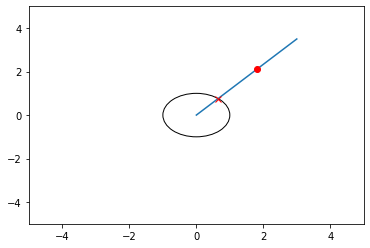

In [63]:
# Test the function
center = (0, 0)
radius = 1
p1 = (3, 3.5)
intersection_point = intersecting_point_on_circle(center, radius, p1)
midpoint = get_midpoint(p1, intersection_point)
print(intersection_point)
visualize_circle_line(center, radius, p1, intersection_point, midpoint)

### 3D version

3.4641016151377544
[0.57735027 0.57735027 0.57735027]


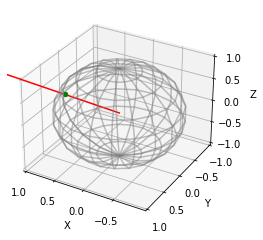

In [64]:
# Test the function
center = (0, 0, 0)
radius = 1
p1 = (2, 2, 2)
intersection_point = intersecting_point_on_circle(center, radius, p1)
midpoint = get_midpoint(p1, intersection_point)
print(intersection_point)

visualize_sphere_line(center, radius, p1, intersection_point)
